# Vereval (Gujarat)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import spectral
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
def normalize_data(data):
    """
    Normalize hyperspectral data.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

In [2]:
img = spectral.open_image(r"C:\Users\NNadi\Downloads\ang20160308t045326rfl\ang20160308t045326_rfl_v2m4\ang20160308t045326_corr_v2m4_img.hdr")
cropped_img = img[300:700,40:500,:]
cropped_img = normalize_data(cropped_img)

Image shape: (5752, 666, 425)
Metadata keys: dict_keys(['description', 'samples', 'lines', 'bands', 'header offset', 'file type', 'data type', 'interleave', 'byte order', 'map info', 'crosstrack scatter file', 'wavelength units', 'flat field file', 'spectral scatter file', 'correction factors', 'wavelength file', 'wavelength', 'radiance version', 'fwhm', 'bbl', 'rcc file', 'smoothing factors', 'data ignore value', 'bad pixel map'])
Wavelengths: [ 376.44  381.45  386.46  391.47  396.47  401.48  406.49  411.5   416.51
  421.52  426.53  431.54  436.54  441.55  446.56  451.57  456.58  461.59
  466.6   471.6   476.61  481.62  486.63  491.64  496.65  501.66  506.67
  511.67  516.68  521.69  526.7   531.71  536.72  541.73  546.73  551.74
  556.75  561.76  566.77  571.78  576.79  581.8   586.8   591.81  596.82
  601.83  606.84  611.85  616.86  621.86  626.87  631.88  636.89  641.9
  646.91  651.92  656.93  661.93  666.94  671.95  676.96  681.97  686.98
  691.99  696.99  702.    707.01  712.02 

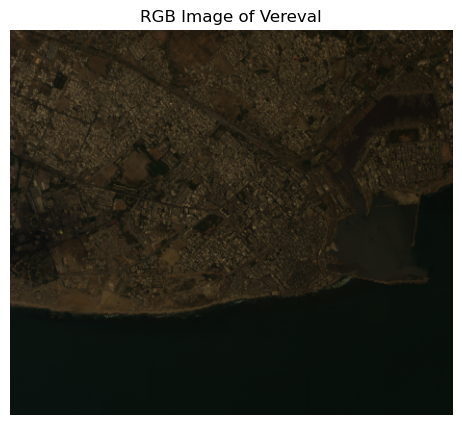

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Print image metadata to confirm it is loaded
print("Image shape:", img.shape)
print("Metadata keys:", img.metadata.keys())

# Access the wavelengths from the metadata
wavelengths = np.array(img.metadata['wavelength'], dtype=float)
print("Wavelengths:", wavelengths)

# Identify RGB band indices using target wavelengths
target_wavelengths = [651.92, 551.74, 451.57]  # Red, Green, Blue wavelengths in nm
indices = [np.argmin(np.abs(wavelengths - tw)) for tw in target_wavelengths]

# Assign indices to variables
red_band, green_band, blue_band = indices
print(f'Red band index: {red_band}, Green band index: {green_band}, Blue band index: {blue_band}')

# Create an RGB image using the selected bands
rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=float)
rgb[..., 0] = img.read_band(red_band)
rgb[..., 1] = img.read_band(green_band)
rgb[..., 2] = img.read_band(blue_band)


# Crop the image to the top 50%
height = img.shape[0]
cropped_rgb = rgb[300:700,40:500,:]

# Step 7: Display the cropped RGB image
plt.figure(figsize=(10, 5))  # Adjust figure size for better aspect ratio
plt.imshow(cropped_rgb)
plt.title('RGB Image of Vereval')
plt.axis('off')
plt.show()

In [4]:
def apply_pca(hsi_data, n_components=105):
    # Flatten the hyperspectral image data for PCA
    hsi_reshaped = hsi_data.reshape(-1, hsi_data.shape[-1])

    # Standardize the data
    scaler = StandardScaler()
    hsi_scaled = scaler.fit_transform(hsi_reshaped)

    # Apply PCA
    pca = PCA(n_components=n_components)
    hsi_pca = pca.fit_transform(hsi_scaled)

    return hsi_pca.reshape(hsi_data.shape[0], hsi_data.shape[1], n_components)

# Apply PCA to both images
vereval_pca = apply_pca(cropped_img)
print(vereval_pca.shape)

(400, 460, 105)


       labels  black_sand    bucket  dry_sand  wet_sand  \
0  381.450012    0.115642  0.386369  0.103350  0.092025   
1  386.459991    0.116975  0.389110  0.104606  0.093875   
2  391.470001    0.118159  0.391676  0.105985  0.095103   
3  396.470001    0.119799  0.395701  0.107524  0.097196   
4  401.480011    0.120185  0.398931  0.108016  0.097518   

   Blue_PP_rope_aligned_around_frame  Orange_placemat  \
0                           0.067346         0.070885   
1                           0.077313         0.077182   
2                           0.084455         0.082482   
3                           0.091483         0.080301   
4                           0.105249         0.081901   

   bottle_empty_and_crushed   waste_rope  white_transparant_plastic_bag   
0                   0.276967    0.122480                        0.248264  
1                   0.280068    0.131832                        0.269402  
2                   0.281234    0.139610                        0.299758  
3 

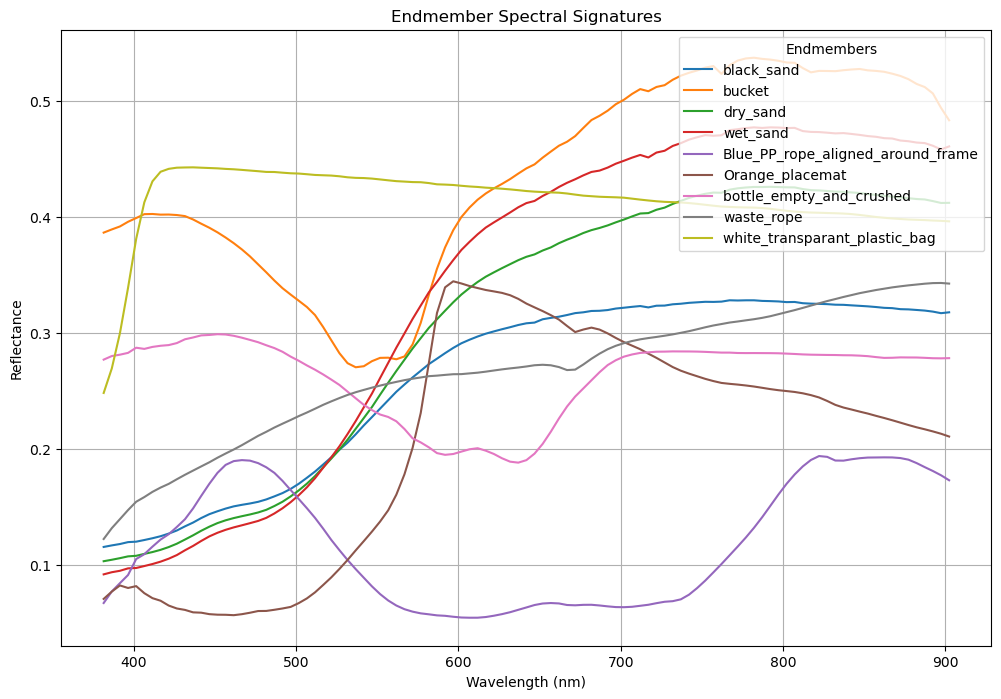

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file containing the spectral signatures
excel_path = r"C:\Users\NNadi\Downloads\Spectral_library_5_bucket_sand_SVC (1).xlsx"
spectral_signatures_df = pd.read_excel(excel_path)

# Display the first few rows to understand its structure
print(spectral_signatures_df.head())

# Extract wavelengths from the first column
wavelengths = spectral_signatures_df.iloc[:, 0].values  # First column as wavelengths

# Extract spectral signature values from the remaining columns
spectral_signatures = spectral_signatures_df.iloc[:, 1:].values  # All other columns as signatures

# Get endmember class names from the header
classNames = spectral_signatures_df.columns[1:]  # Use column names as class names

# Plot the endmember signatures
plt.figure(figsize=(12, 8))
for i, signature in enumerate(spectral_signatures.T):  # Transpose for iteration
    plt.plot(wavelengths, signature, label=classNames[i])

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Endmember Spectral Signatures')
plt.legend(title='Endmembers', loc='upper right')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming img is your hyperspectral image with shape (num_rows, num_cols, num_bands)
# For example, let's create a dummy hyperspectral image with 425 bands
# img = np.random.rand(480, 360, 425)  # Dummy data; replace with your actual image data

# Ensure correct dimensions
num_rows, num_cols, num_bands = cropped_img.shape
black_red = LinearSegmentedColormap.from_list('black_red', [(0, 0, 0), (1, 0, 0)])


# Reshape the 3D image data to 2D (pixels, bands) for PCA
pixels = cropped_img.reshape(-1, num_bands)

# Perform PCA to reduce dimensions to 105 bands
target_num_bands = 105
pca = PCA(n_components=target_num_bands)
reduced_data = pca.fit_transform(pixels)

# Reshape back to the original 3D structure with reduced bands
reduced_hyperspectral_image = reduced_data.reshape(num_rows, num_cols, target_num_bands)

print("Original shape:", cropped_img.shape)
print("Reduced shape:", reduced_hyperspectral_image.shape)


Original shape: (400, 460, 425)
Reduced shape: (400, 460, 105)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spectral import *
from scipy.optimize import nnls
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap

def normalize_data(data):
    """
    Normalize hyperspectral data.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# LS: Unconstrained Least Squares
def ls(pixel, signatures):
    reg = LinearRegression(fit_intercept=False)
    reg.fit(signatures.T, pixel)
    return reg.coef_

# SCLS: Sum-to-One Constrained Least Squares
def scls(pixel, signatures):
    abundance = ls(pixel, signatures)
    total_abundance = np.sum(abundance)
    return abundance if total_abundance == 0 else abundance / total_abundance

# NCLS: Nonnegativity Constrained Least Squares
def ncls(pixel, signatures):
    abundances, _ = nnls(signatures.T, pixel)
    return abundances

# NSCLS: Normalized Sum-to-One Constrained Least Squares
def nscls(pixel, signatures):
    abundance = scls(pixel, signatures)
    abundance[abundance < 0] = 0
    total_abundance = np.sum(abundance)
    return abundance if total_abundance == 0 else abundance / total_abundance

# NNCLS: Normalized Nonnegativity Constrained Least Squares
def nncls(pixel, signatures):
    abundance = ncls(pixel, signatures)
    total_abundance = np.sum(abundance)
    return abundance if total_abundance == 0 else abundance / total_abundance

# FCLS: Fully Constrained Least Squares
def fcls(pixel, signatures):
    abundances, _ = nnls(signatures.T, pixel)
    total_abundance = np.sum(abundances)
    return abundances if total_abundance == 0 else abundances / total_abundance

def estimate_abundance(hsi_data, signatures, method):
    """
    Estimate abundance maps using a given method (LS, SCLS, NCLS, etc.)
    """
    rows, cols, bands = hsi_data.shape
    num_classes = signatures.shape[0]
    abundance_maps = np.zeros((rows, cols, num_classes))

    for r in range(rows):
        for c in range(cols):
            pixel = hsi_data[r, c, :]
            abundance = method(pixel, signatures)
            abundance_maps[r, c, :] = abundance

    return abundance_maps
def visualize_abundance_maps(method_name, abundance_maps, classNames):
    """
    Visualize the abundance maps for selected classes.
    """
    # Classes to display
    selected_classes = ['waste_rope', 'white_transparant_plastic_bag', 'bucket']
    selected_indices = [classNames.index(cls) for cls in selected_classes]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    cmap = 'gist_earth'

    for i, idx in enumerate(selected_indices):
        norm = plt.Normalize(vmin=np.min(abundance_maps[:, :, idx]), vmax=np.max(abundance_maps[:, :, idx]) * 0.5)
        axes[i].imshow(abundance_maps[:, :, idx], cmap=cmap, norm=norm)
        axes[i].set_title(f'Abundance of {classNames[idx]} ({method_name})')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



In [8]:
# Step 1: Load Spectral Signatures (9 classes, 105 bands)
spectral_signatures_df = pd.read_excel(r"C:\Users\NNadi\Downloads\Spectral_library_5_bucket_sand_SVC (1).xlsx")
signatures = spectral_signatures_df.iloc[:, 1:].values.T  # Transpose to get shape (9, 105)
signatures = normalize_data(signatures)

# Define class names based on your dataset
classNames = [
    'black_sand', 'bucket', 'dry_sand', 'wet_sand', 
    'Blue_PP_rope_aligned_around_frame', 'Orange_placemat', 
    'bottle_empty_and_crushed', 'waste_rope', 'white_transparant_plastic_bag'
]

# Step 2: Load Hyperspectral Data (already reduced to 105 bands with PCA)
hsi_image = vereval_pca  # This should have the shape (rows, cols, 105)



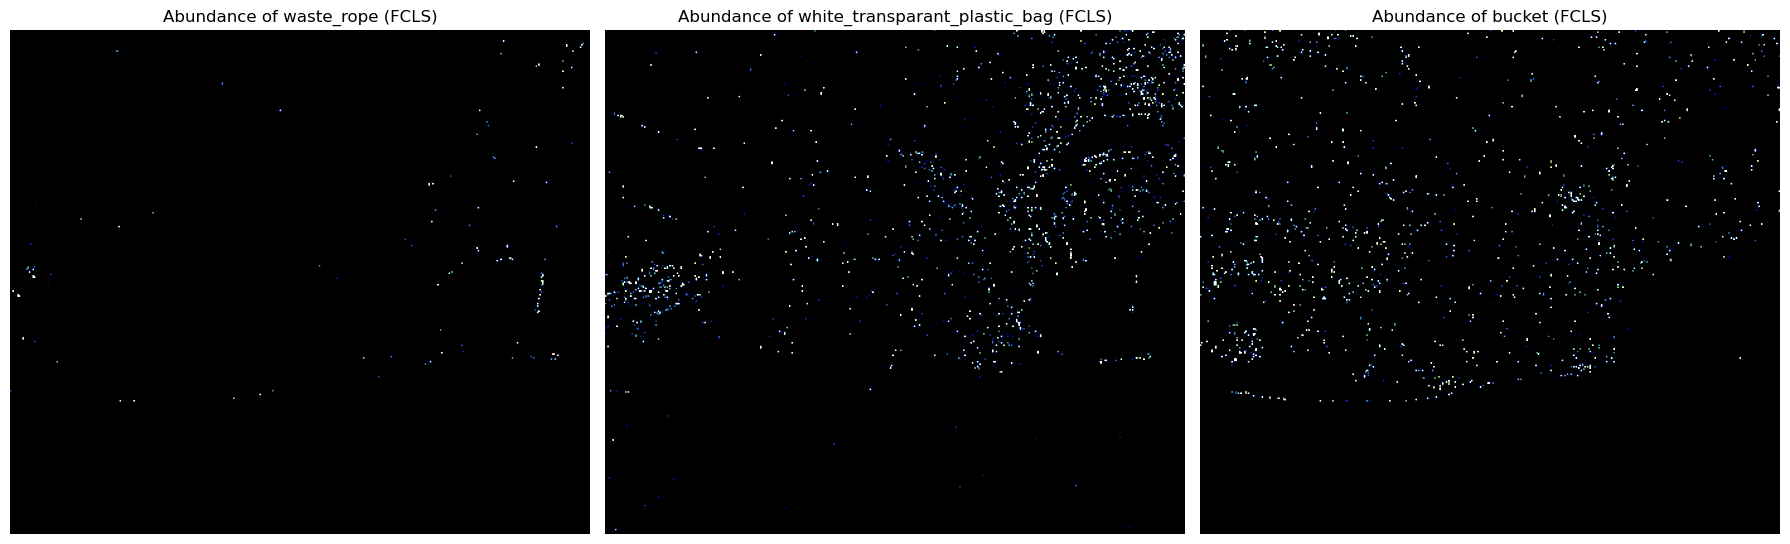

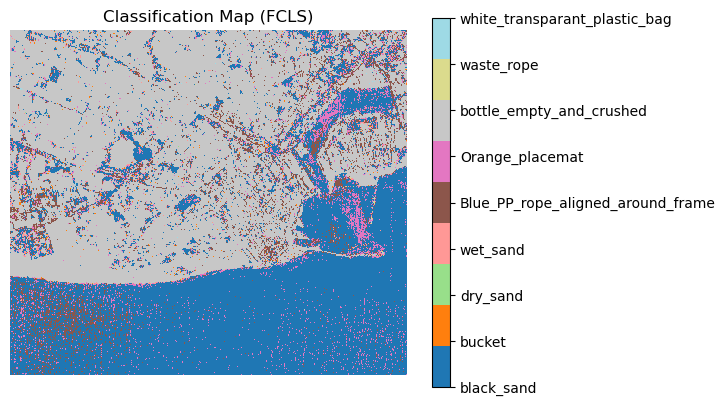

In [9]:
abundance_maps_fcls = estimate_abundance(hsi_image, signatures, fcls)
classification_map_fcls = np.argmax(abundance_maps_fcls, axis=2)
visualize_abundance_maps('FCLS', abundance_maps_fcls, classNames)
plt.figure()
plt.imshow(classification_map_fcls, cmap=plt.get_cmap('tab20', len(classNames)), interpolation='nearest')
plt.title('Classification Map (FCLS)')
plt.colorbar(ticks=range(len(classNames)), format=plt.FuncFormatter(lambda x, _: classNames[int(x)]))
plt.axis('off')
plt.show()

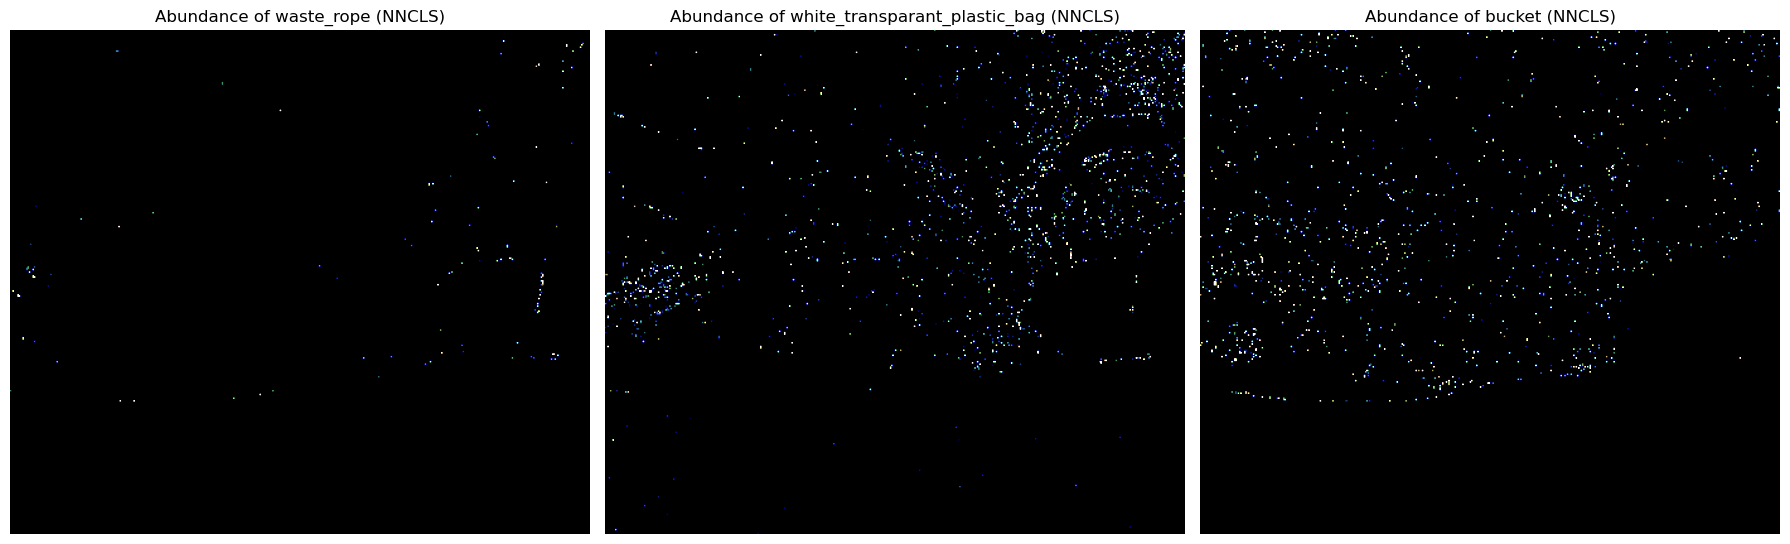

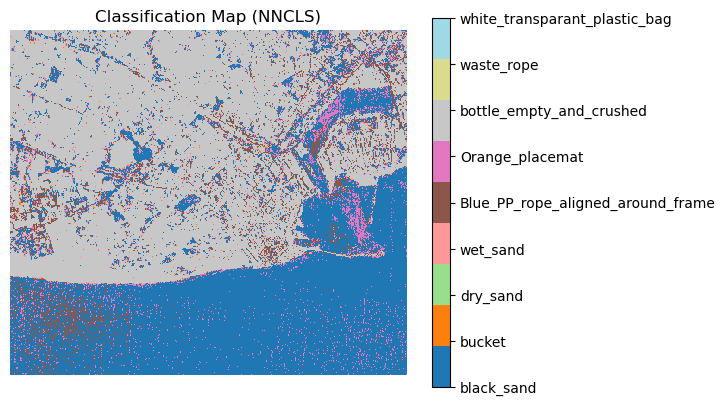

In [10]:
abundance_maps_nncls = estimate_abundance(hsi_image, signatures, nncls)
classification_map_nncls = np.argmax(abundance_maps_nncls, axis=2)
visualize_abundance_maps('NNCLS', abundance_maps_nncls, classNames)
plt.figure()
plt.imshow(classification_map_nncls, cmap=plt.get_cmap('tab20', len(classNames)), interpolation='nearest')
plt.title('Classification Map (NNCLS)')
plt.colorbar(ticks=range(len(classNames)), format=plt.FuncFormatter(lambda x, _: classNames[int(x)]))
plt.axis('off')
plt.show()